<a href="https://colab.research.google.com/github/sapnachavan7875-lgtm/Data-Science-Learning/blob/main/Student_Performance_Prediction_Using_Machine_LEarning_and_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

from xgboost import XGBClassifier, XGBRegressor

from lightgbm import LGBMClassifier, LGBMRegressor

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout

import scipy
import statsmodels.api as sm

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

print("All libraries imported successfully")

All libraries imported successfully


In [ ]:
df = pd.read_csv("/content/student-mat.csv")

**Shape Check**

In [ ]:
df.shape

(395, 33)

In [ ]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

**First Rows**

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


**Dataset Info Check**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

**Missing Values**

In [ ]:
df.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


**Dataset of StatiStical Summary**

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


**Target and Features Define**

In [ ]:
X = df.drop("G3", axis=1)
y = df["G3"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (395, 32)
Target shape: (395,)


**Target Variable (G3) Distribution**

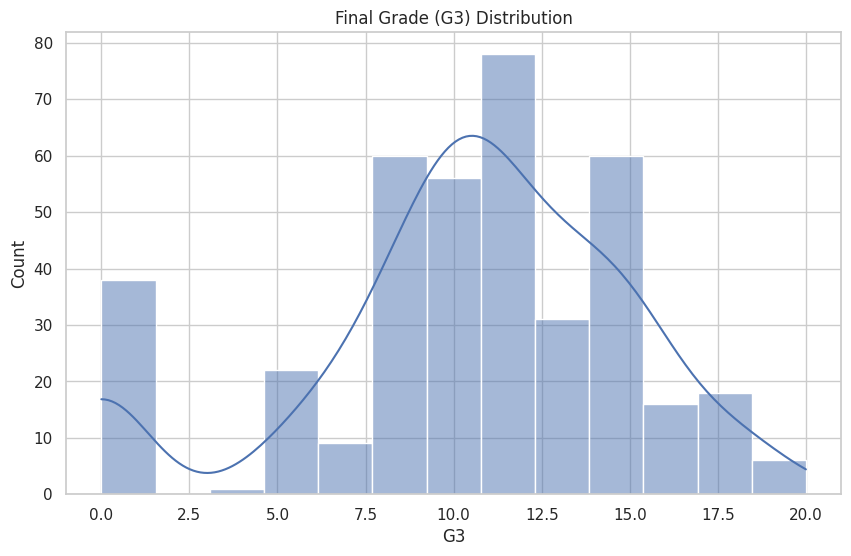

In [ ]:
plt.figure()
sns.histplot(df["G3"], kde=True)
plt.title("Final Grade (G3) Distribution")
plt.show()

**G3 Distrubution**

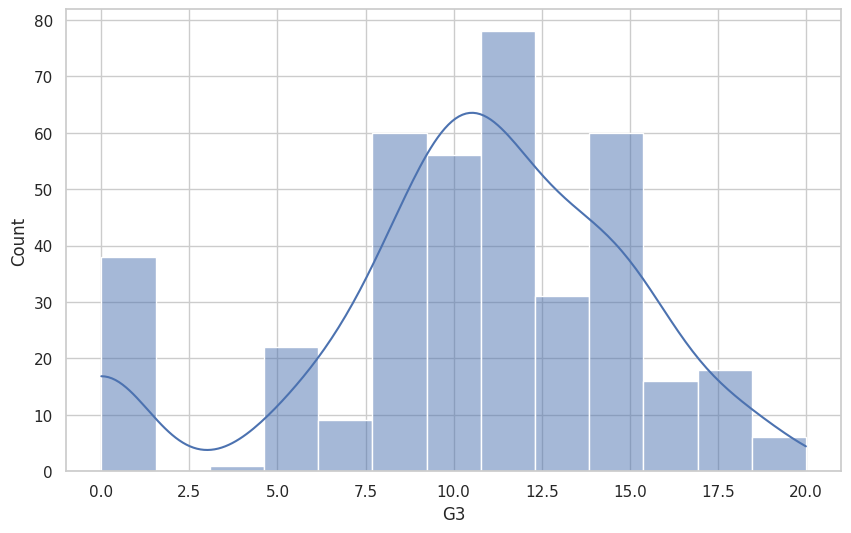

In [ ]:
plt.figure()
sns.histplot(df["G3"], kde=True)
plt.show()

**G1 Distribution**

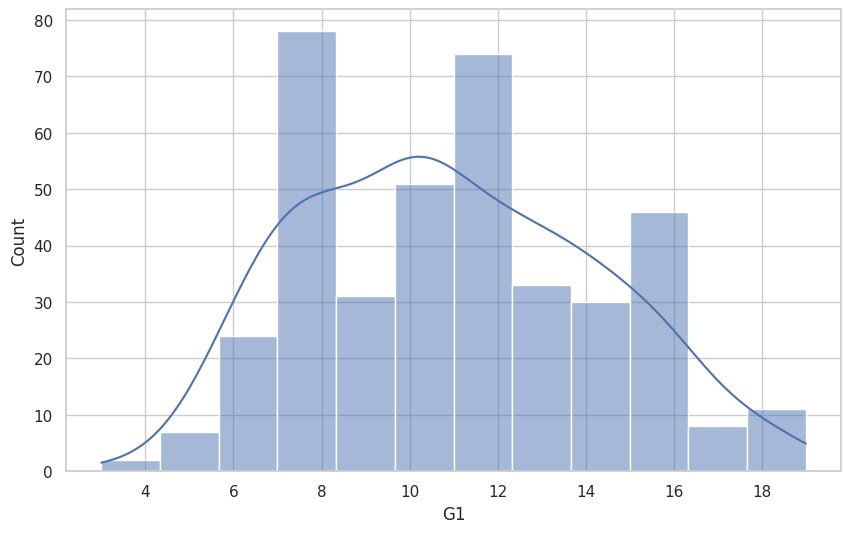

In [ ]:
plt.figure()
sns.histplot(df["G1"], kde=True)
plt.show()

**G2 Distribution**

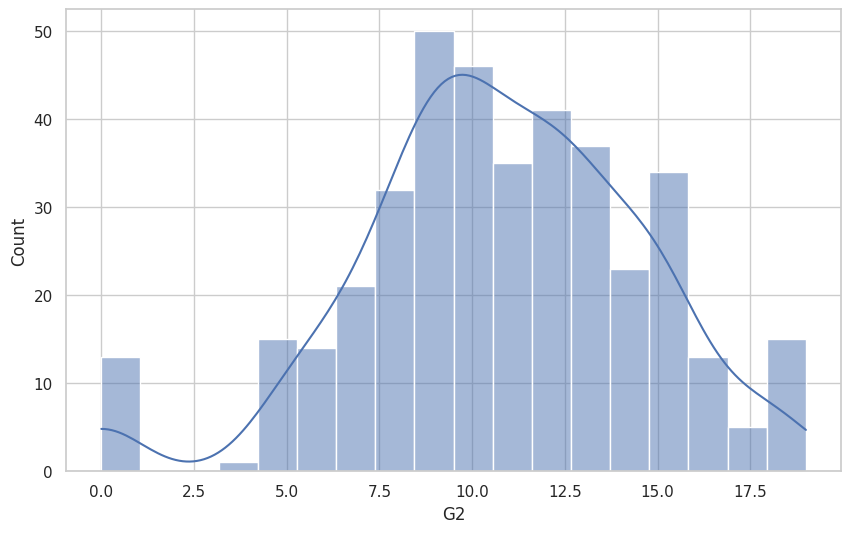

In [ ]:
plt.figure()
sns.histplot(df["G2"], kde=True)
plt.show()

**Age Distrubution**

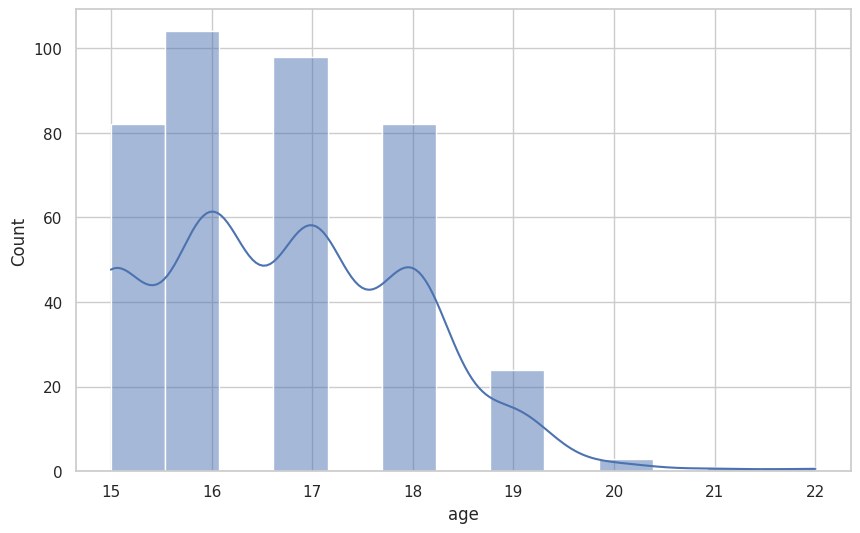

In [ ]:
plt.figure()
sns.histplot(df["age"], kde=True)
plt.show()

**Absences Distrubution**

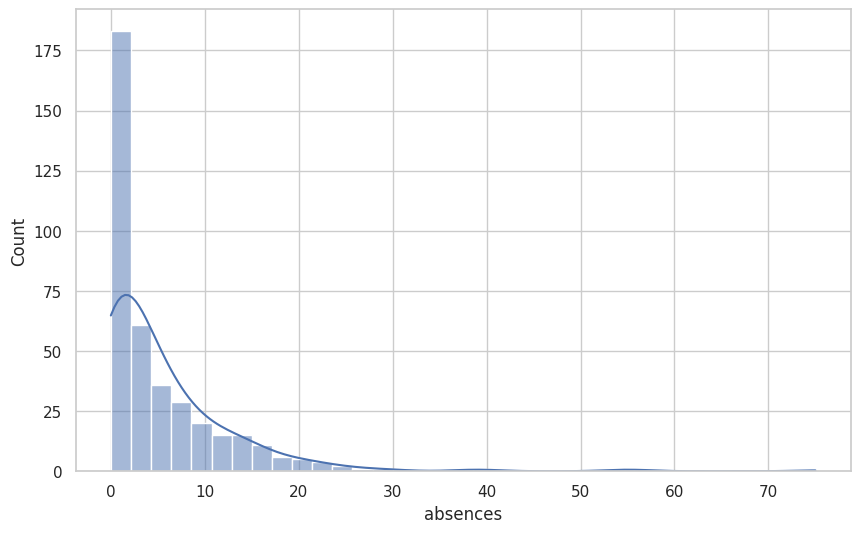

In [ ]:
plt.figure()
sns.histplot(df["absences"], kde=True)
plt.show()

**Studytime count**

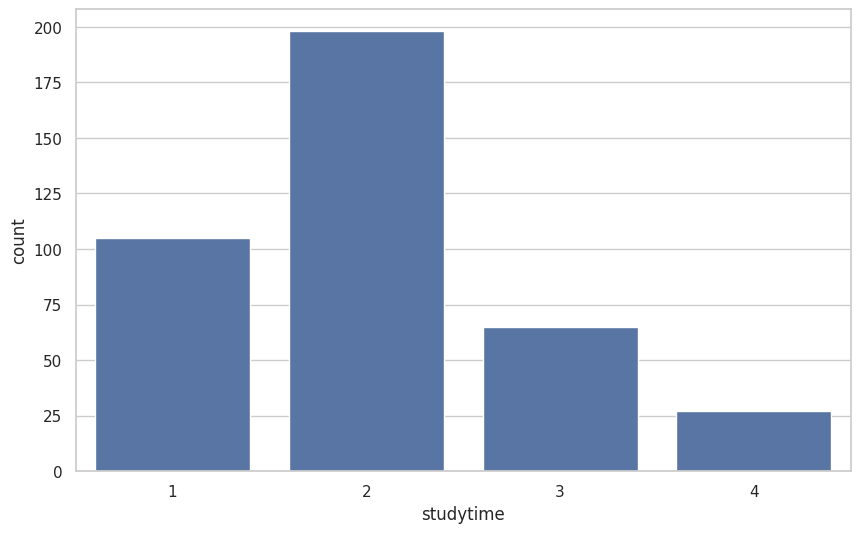

In [ ]:
sns.countplot(x=df["studytime"])
plt.show()

**Failures Count**

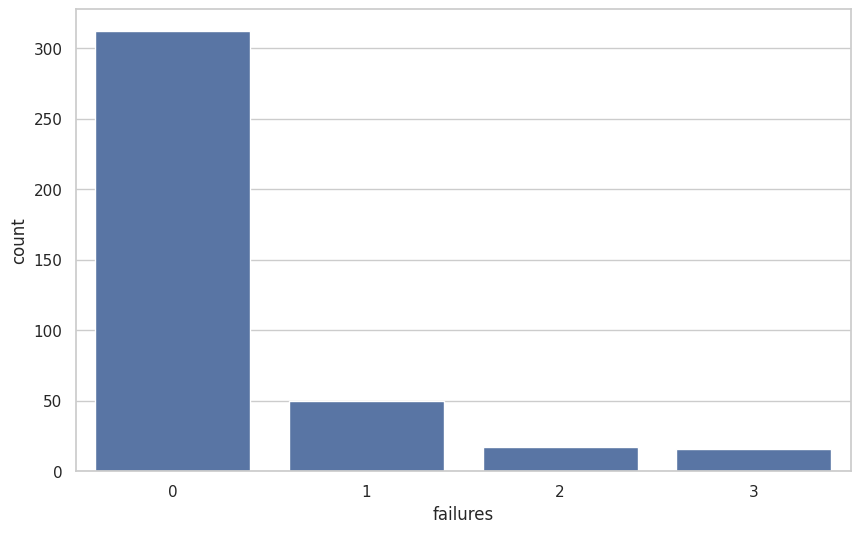

In [ ]:
sns.countplot(x=df["failures"])
plt.show()

**Sex Count**

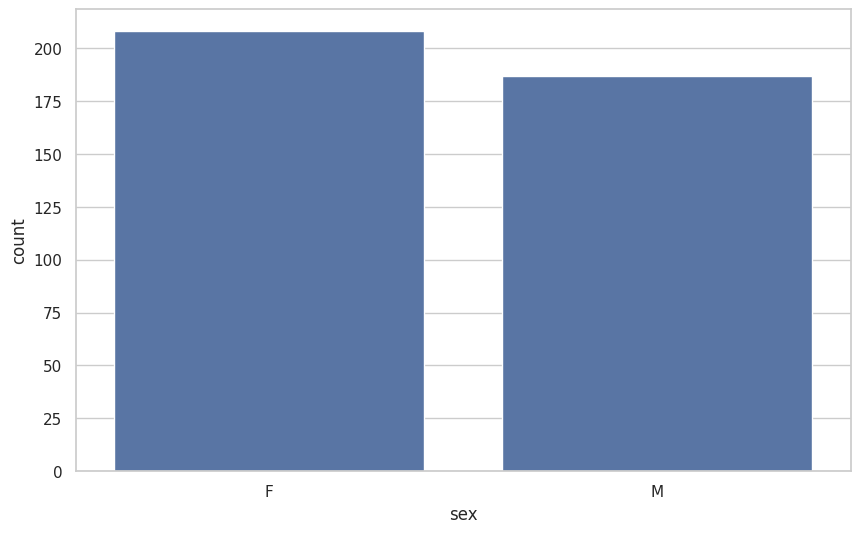

In [ ]:
sns.countplot(x=df["sex"])
plt.show()

**School Count**

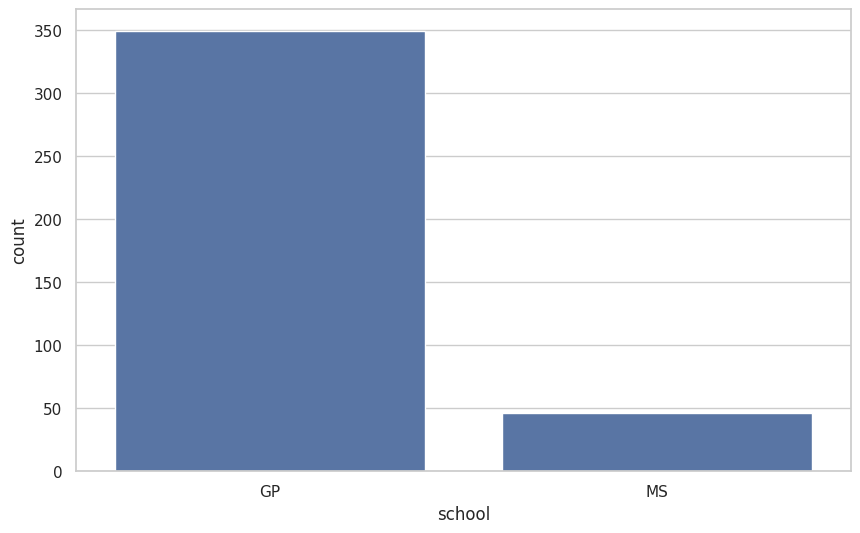

In [ ]:
sns.countplot(x=df["school"])
plt.show()

**Adress Count**

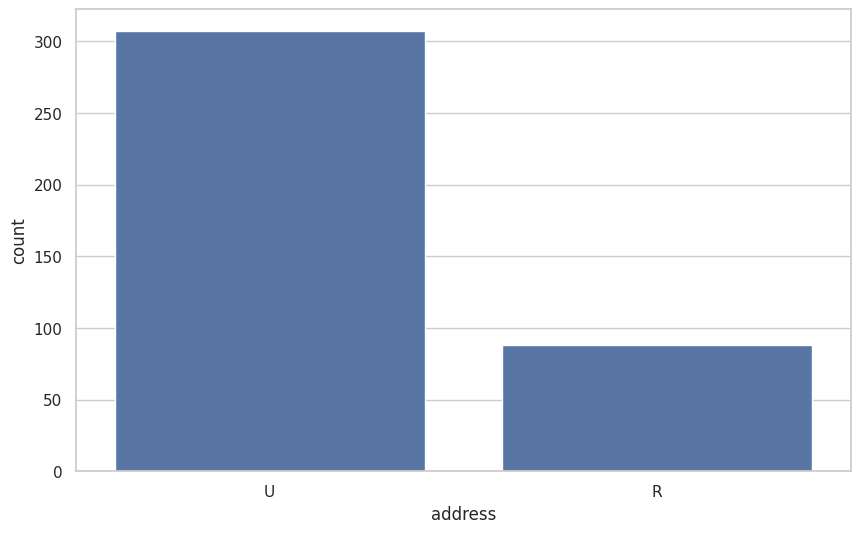

In [ ]:
sns.countplot(x=df["address"])
plt.show()

**G3 vs Studytime**

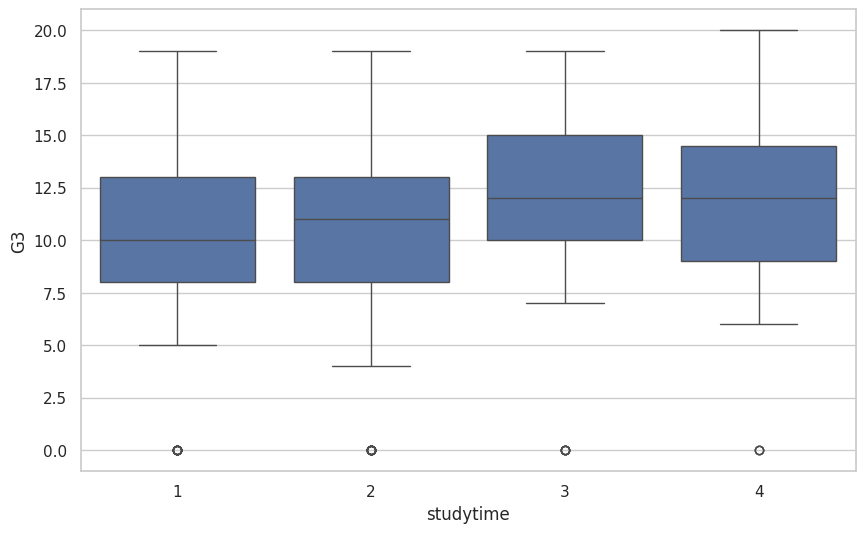

In [ ]:
sns.boxplot(x="studytime", y="G3", data=df)
plt.show()

**G3 vs Failures**

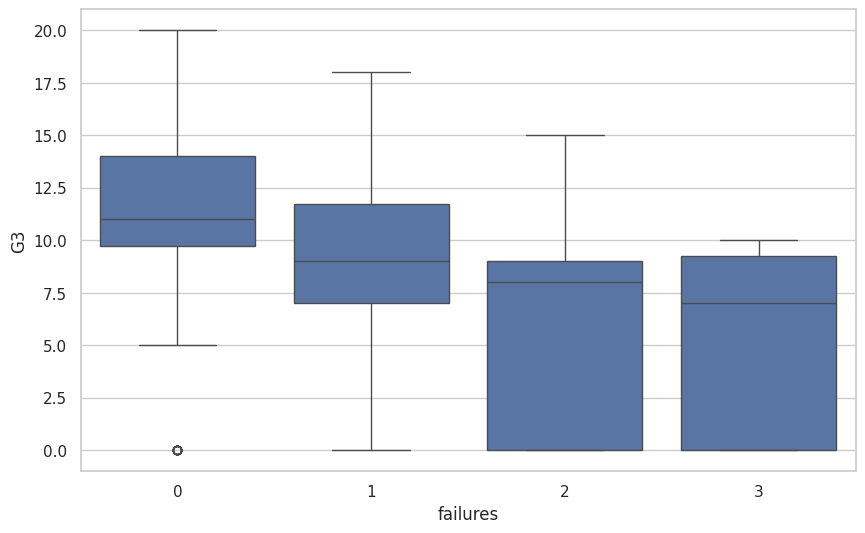

In [ ]:
sns.boxplot(x="failures", y="G3", data=df)
plt.show()

**G3 vs Sex**

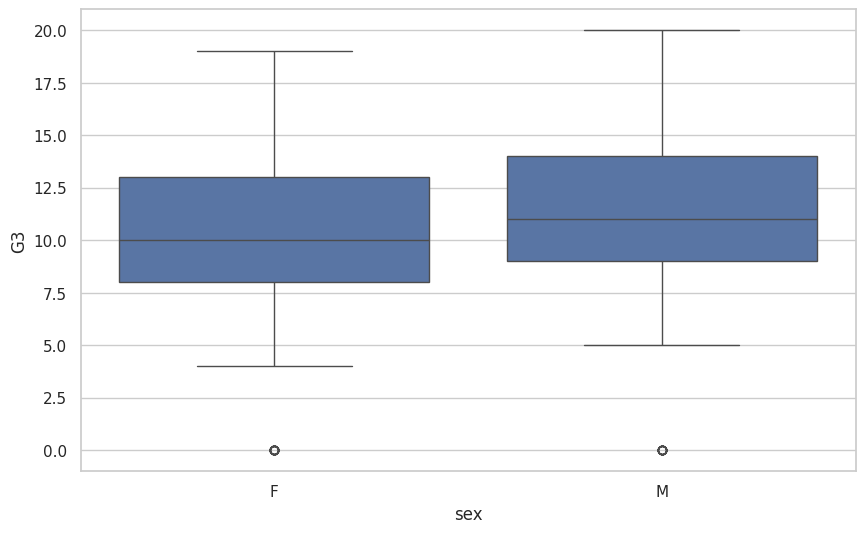

In [ ]:
sns.boxplot(x="sex", y="G3", data=df)
plt.show()

**G3 Vs School**

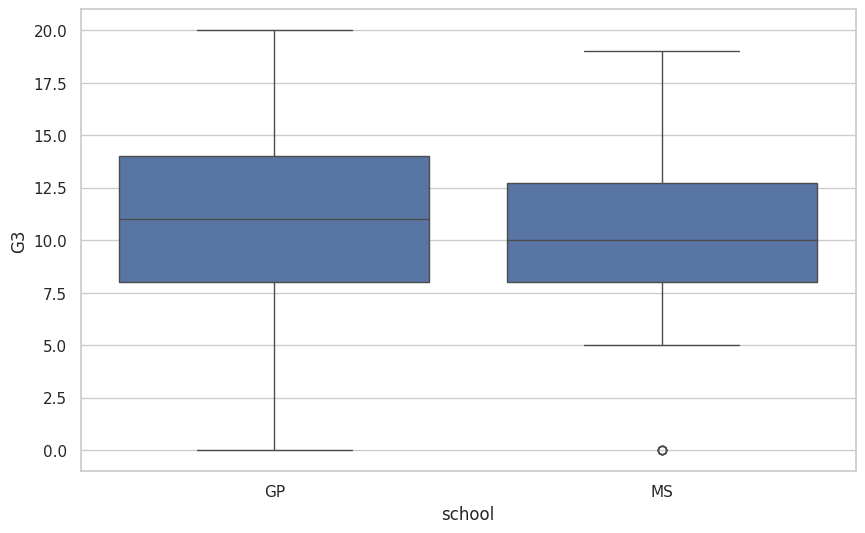

In [ ]:
sns.boxplot(x="school", y="G3", data=df)
plt.show()

**G3 vs Adress**

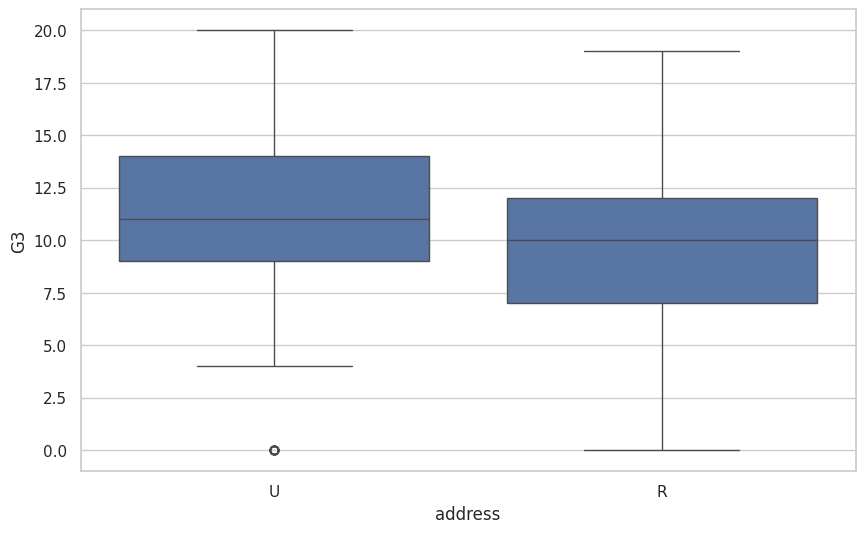

In [ ]:
sns.boxplot(x="address", y="G3", data=df)
plt.show()

**G1 vs G3**

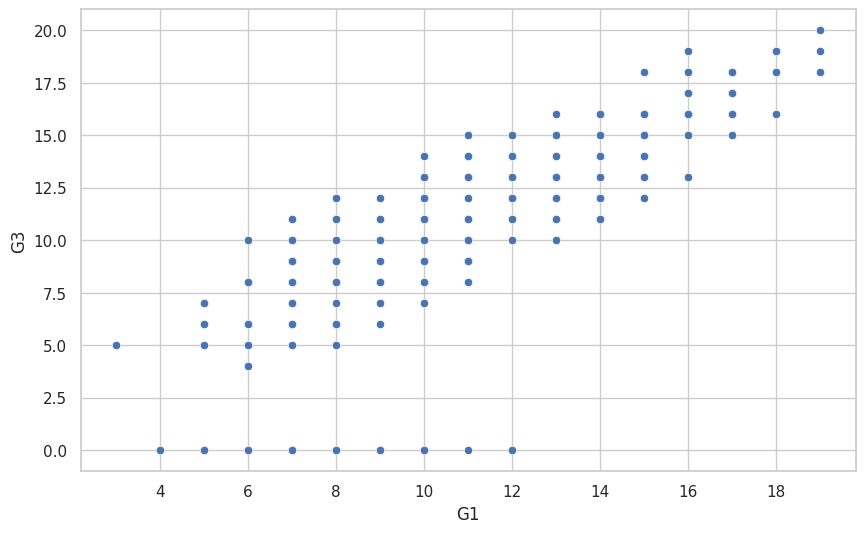

In [ ]:
sns.scatterplot(x="G1", y="G3", data=df)
plt.show()

**G2 vs G3 scatte**

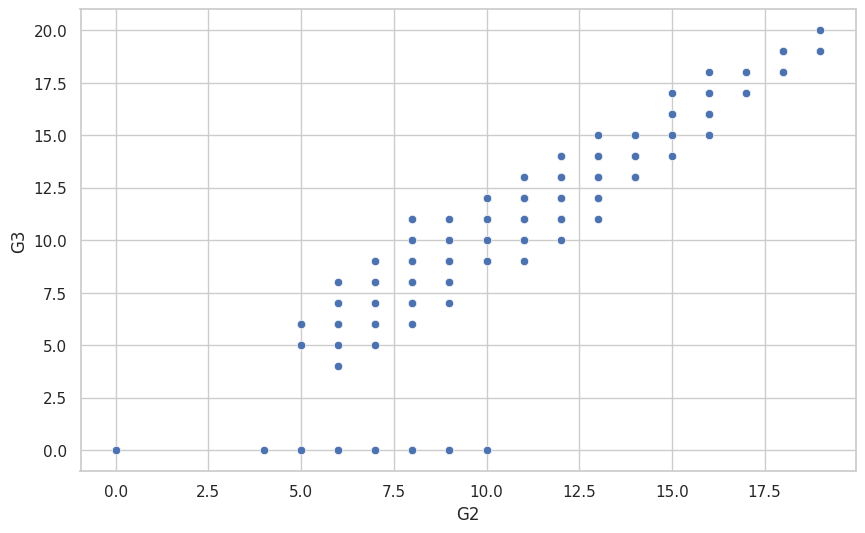

In [ ]:
sns.scatterplot(x="G2", y="G3", data=df)
plt.show()

**Absences vs G3**

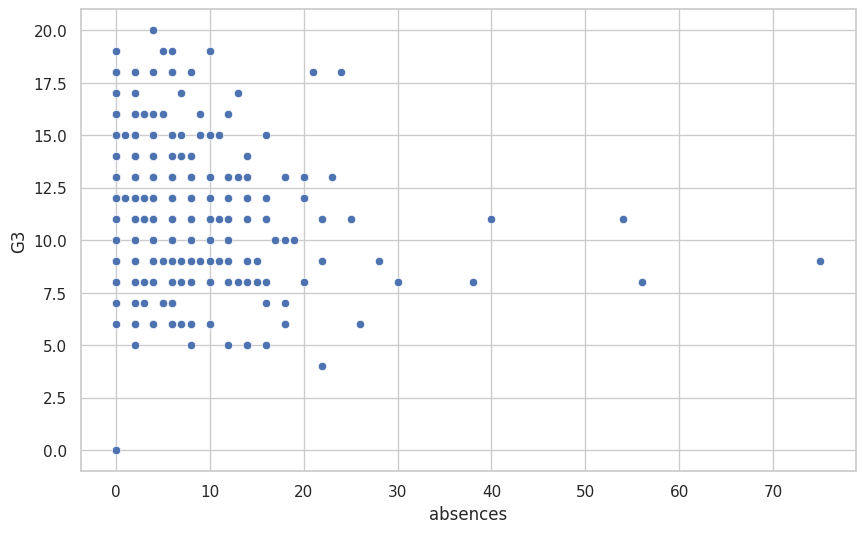

In [ ]:
sns.scatterplot(x="absences", y="G3", data=df)
plt.show()

**Age vs G3**

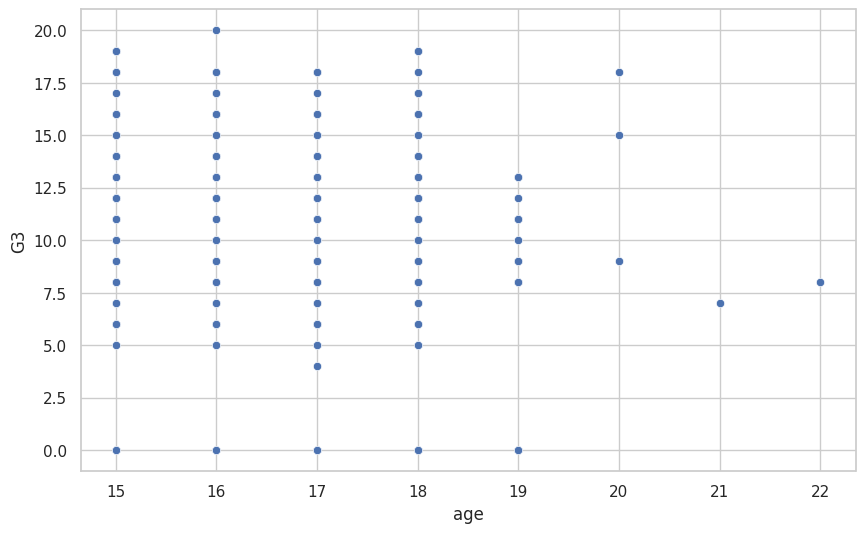

In [ ]:
sns.scatterplot(x="age", y="G3", data=df)
plt.show()

**Correlation Heatmap**

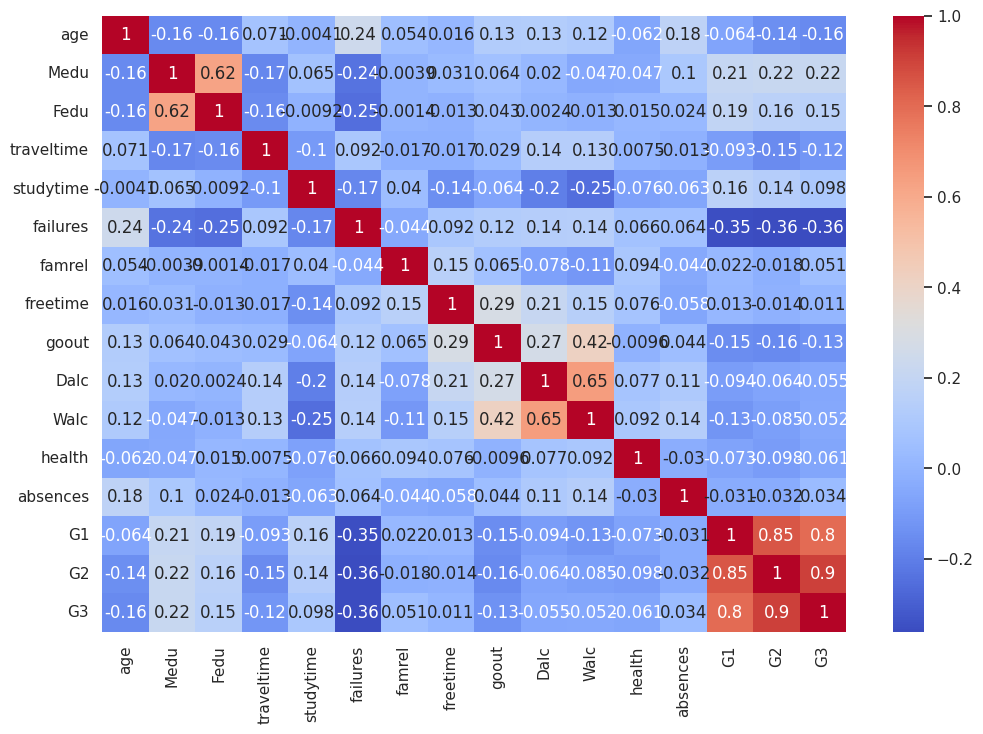

In [ ]:
numeric_df = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()

**pairplot**

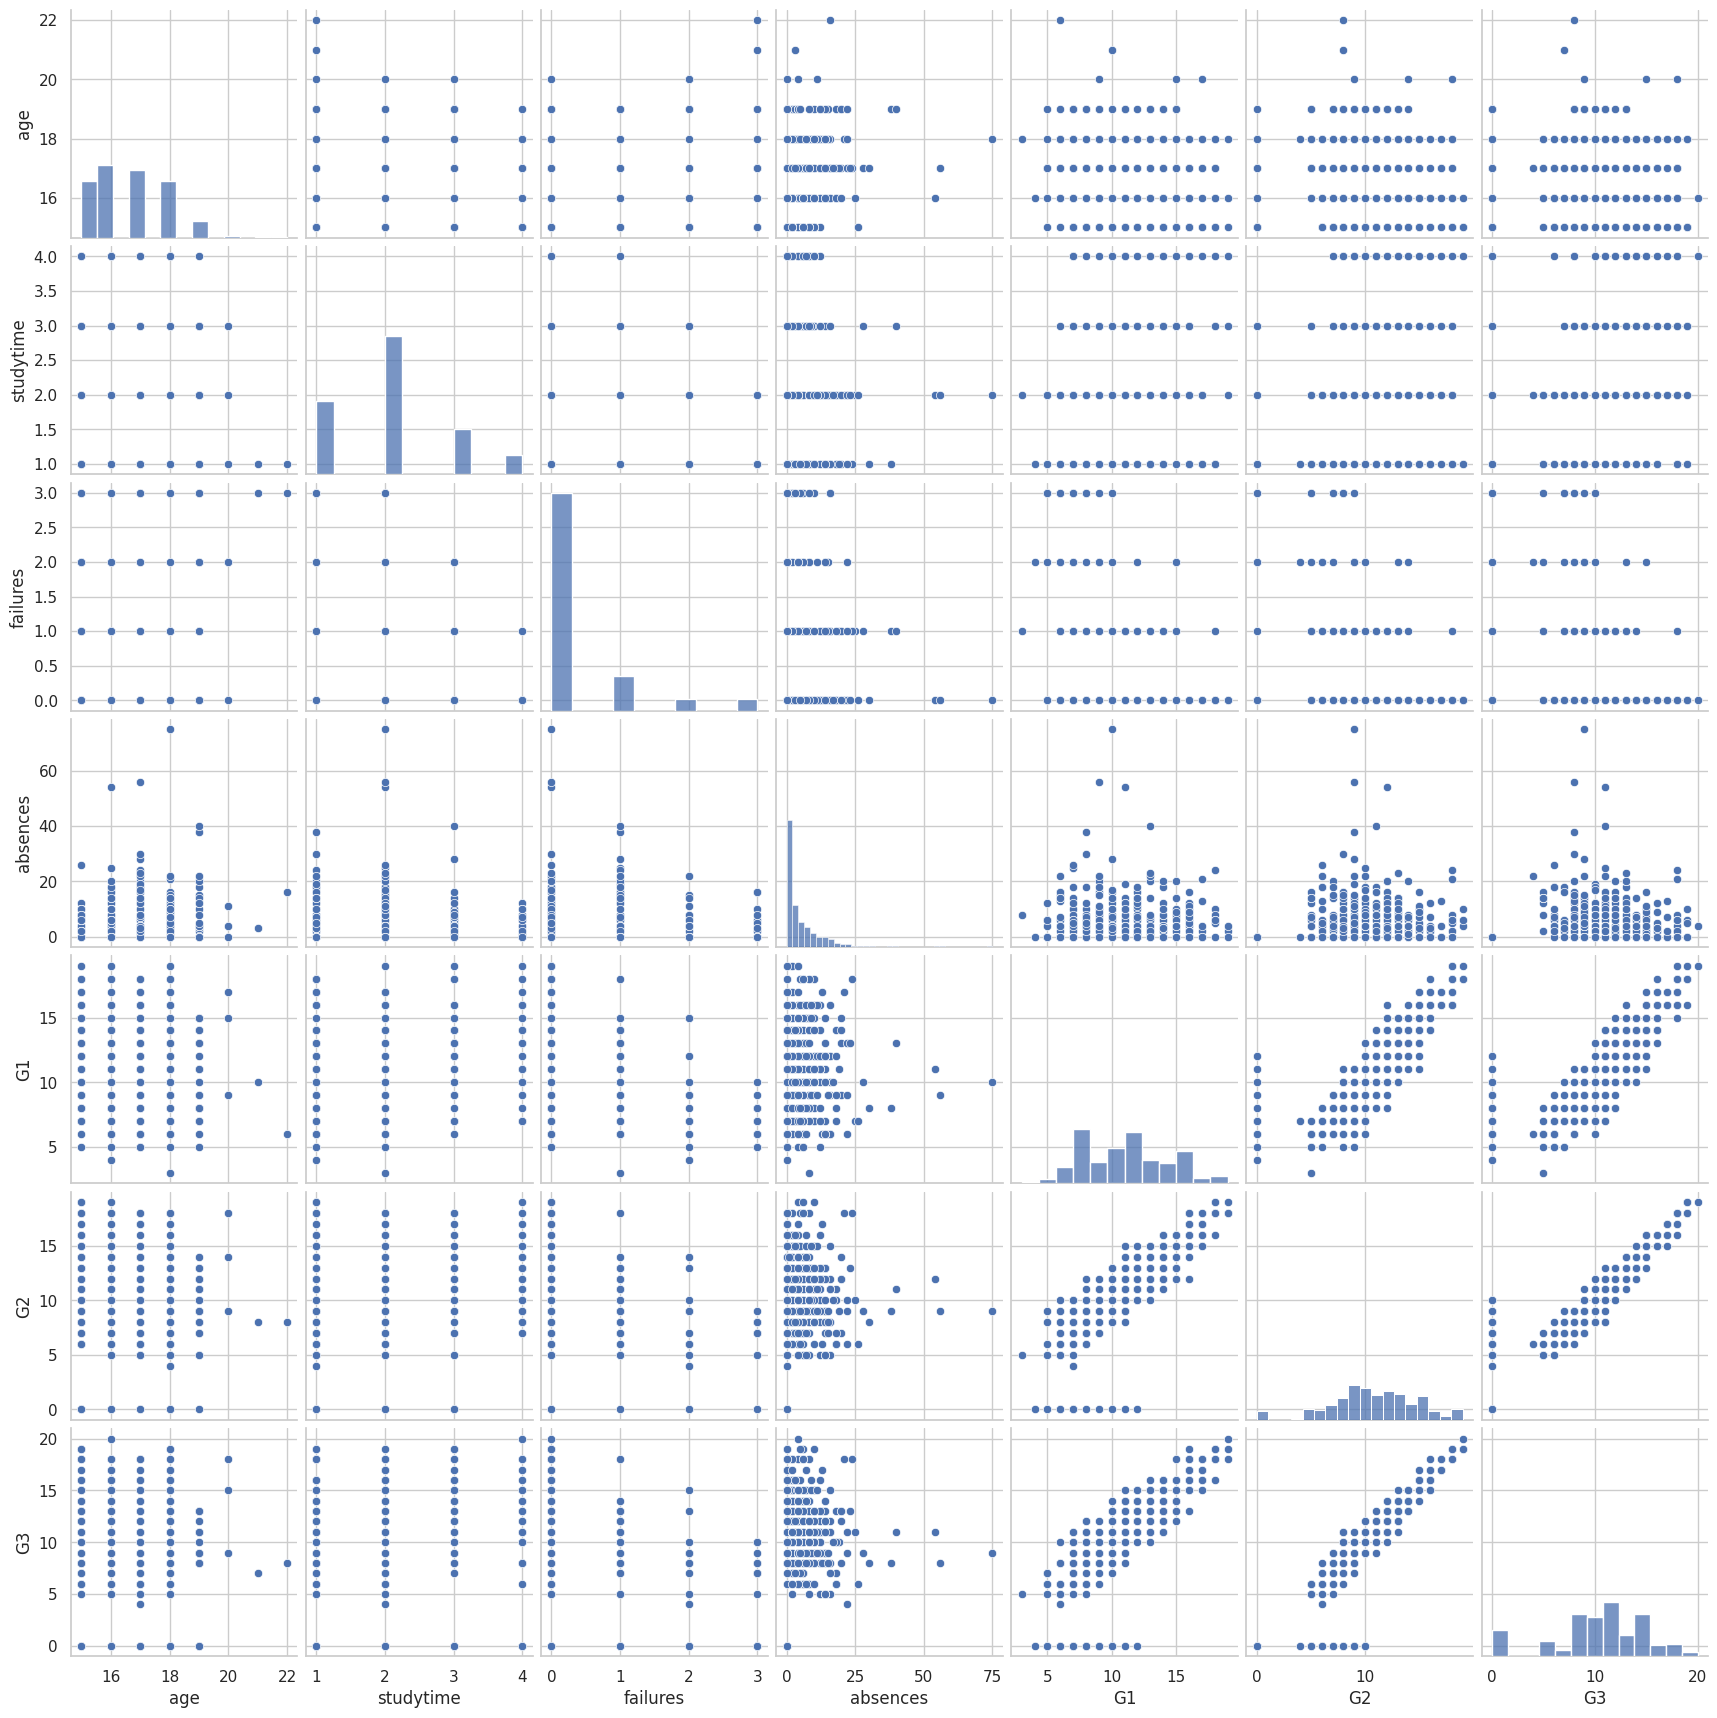

In [ ]:
sns.pairplot(df[["age","studytime","failures","absences","G1","G2","G3"]])
plt.show()

**Average Grade by sex**

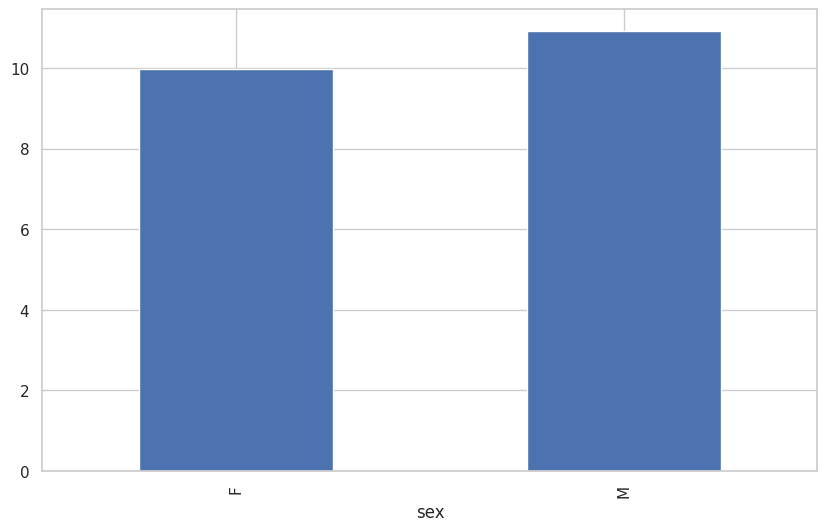

In [ ]:
df.groupby("sex")["G3"].mean().plot(kind="bar")
plt.show()

**average Grade by studytime**

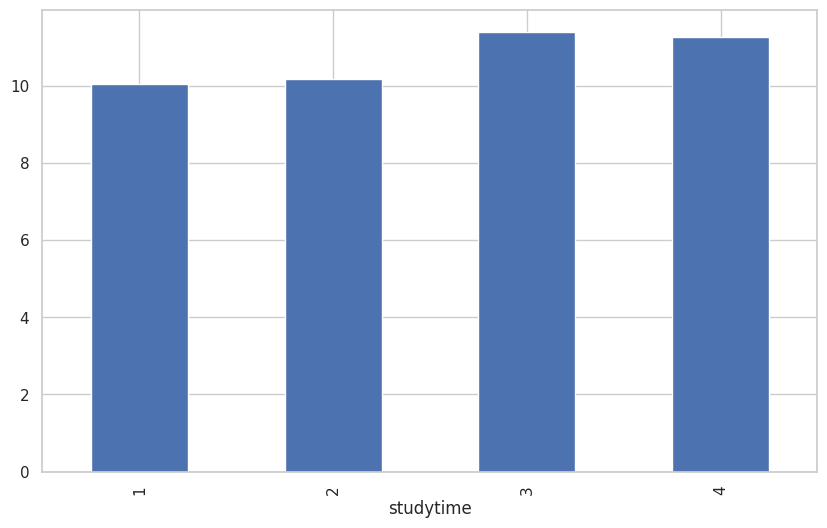

In [ ]:
df.groupby("studytime")["G3"].mean().plot(kind="bar")
plt.show()

**Averagee Grade by school**

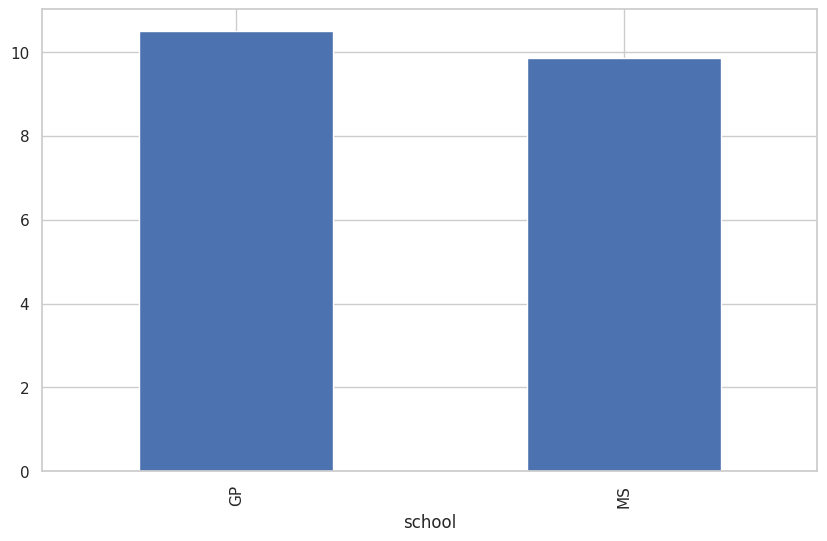

In [ ]:
df.groupby("school")["G3"].mean().plot(kind="bar")
plt.show()

**Average Grade by Adress**

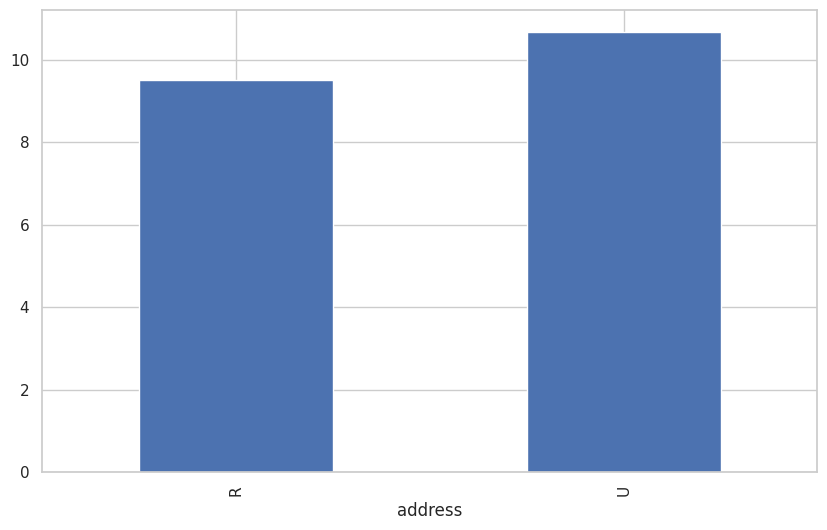

In [ ]:
df.groupby("address")["G3"].mean().plot(kind="bar")
plt.show()

**KDE plot G3**

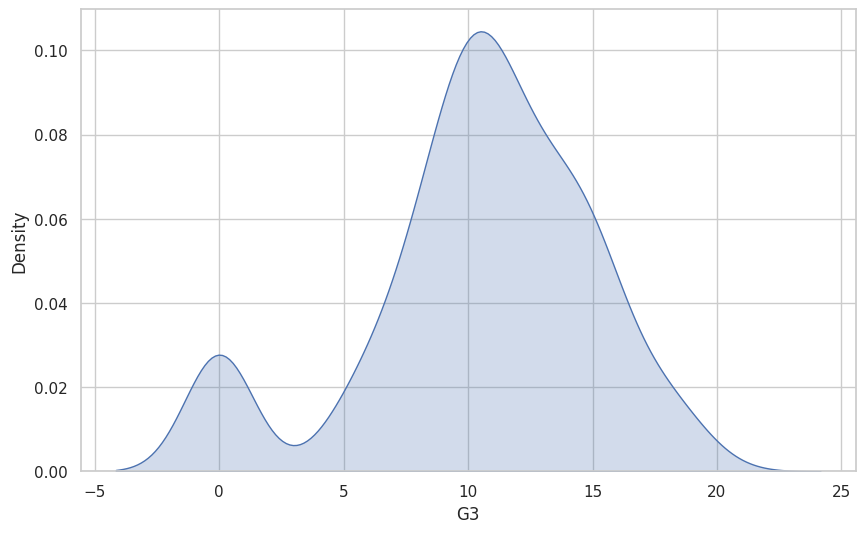

In [ ]:
sns.kdeplot(df["G3"], fill=True)
plt.show()

**Violin Plot Studytime vs G3**

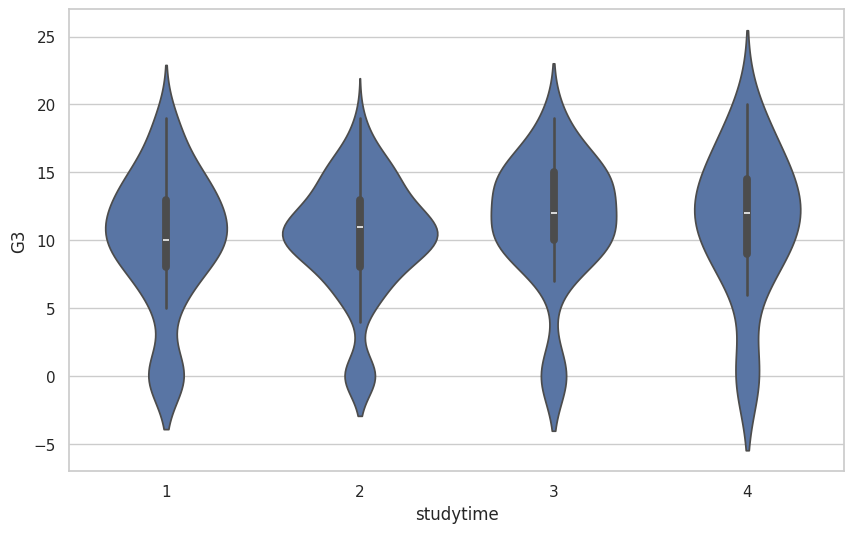

In [ ]:
sns.violinplot(x="studytime", y="G3", data=df)
plt.show()

**Violin Plot Sex Vs G3**

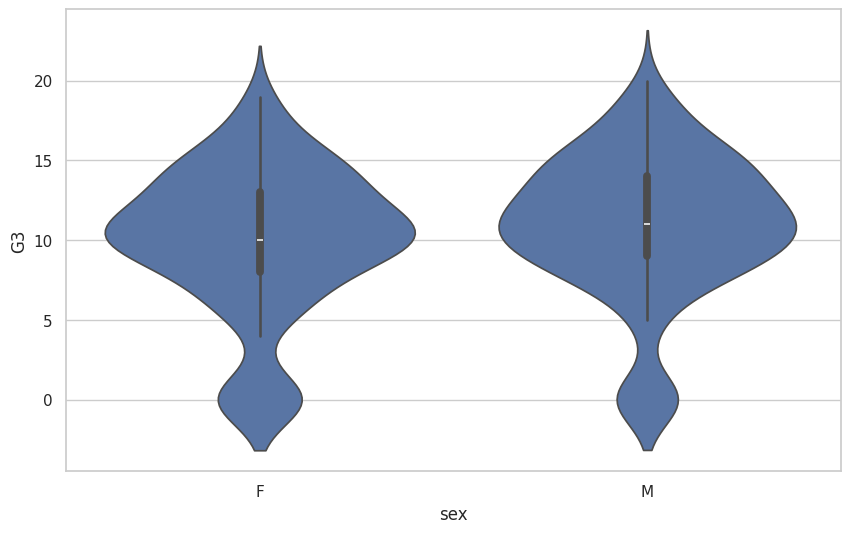

In [ ]:
sns.violinplot(x="sex", y="G3", data=df)
plt.show()

**Strip Plot Failures Vs G3**

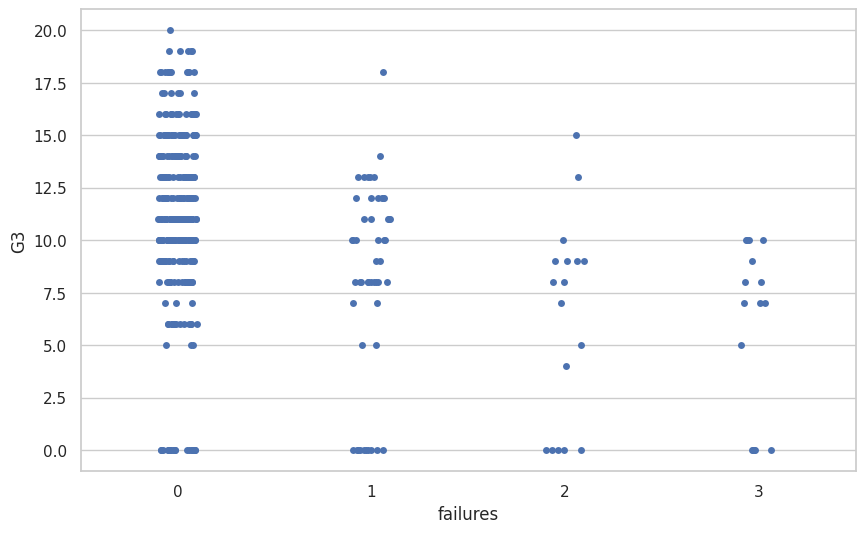

In [ ]:
sns.stripplot(x="failures", y="G3", data=df)
plt.show()

**Swarm plot Study time Vs G3**

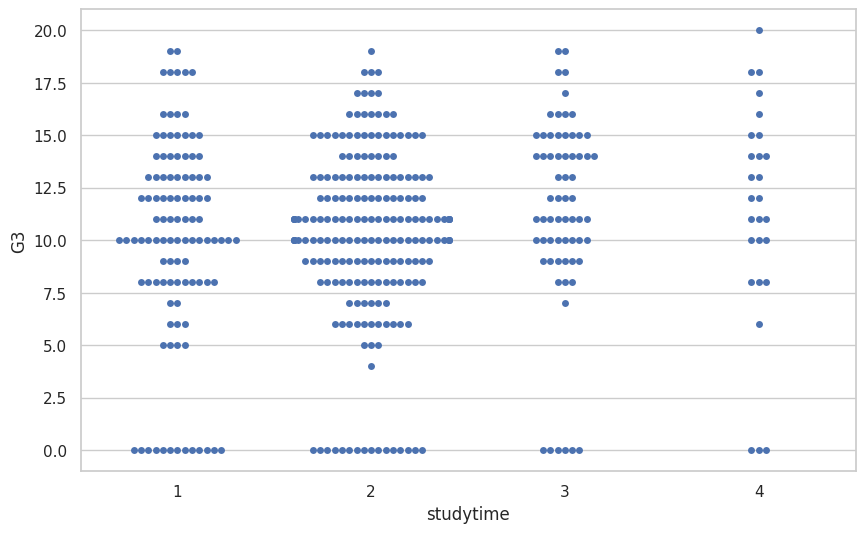

In [ ]:
sns.swarmplot(x="studytime", y="G3", data=df)
plt.show()

**Categorical Columns Convert to numberic**

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = LabelEncoder().fit_transform(df[column])

print("Categorical data converted")

Categorical data converted


In [ ]:
X = df.drop("G3", axis=1)
y = df["G3"]

print(X.shape)
print(y.shape)

(395, 32)
(395,)


**Train_test_Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(316, 32)
(79, 32)
(316,)
(79,)


**Linear Regression Model Train**

In [ ]:
model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)



**Linear Regression Model Accuracy Check**

In [ ]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("MAE:", mae_lr)
print("MSE:", mse_lr)
print("R2 Score:", r2_lr)

MAE: 1.4954750100522765
MSE: 5.03239410886674
R2 Score: 0.7545777855043501


**Random forest Model Train**

In [ ]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)


**Random Forest Model Accuracy Check**

In [ ]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("MAE:", mae_rf)
print("MSE:", mse_rf)
print("R2 Score:", r2_rf)

MAE: 1.1050632911392408
MSE: 3.4867417721518983
R2 Score: 0.8299569015097052


**Linear Regression Model**

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)


**XGBoost Model**

In [ ]:
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)


**Actual Vs Predicted**

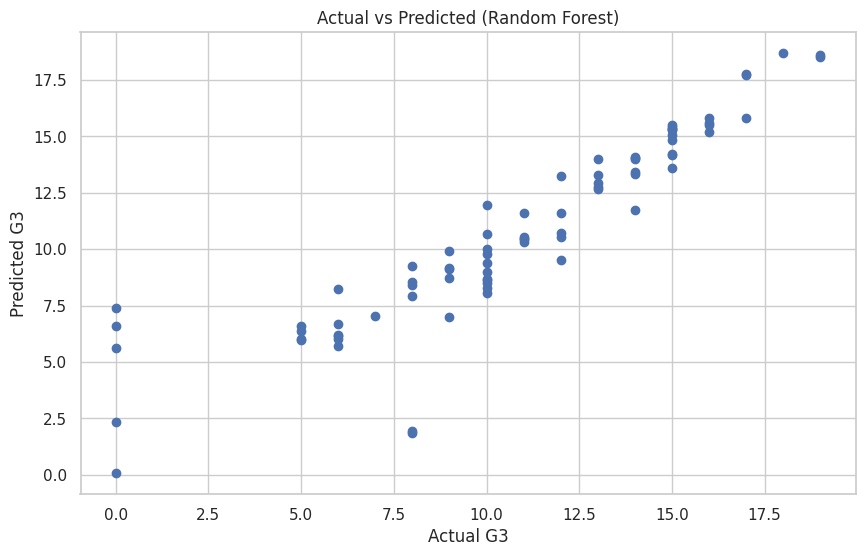

In [ ]:
plt.figure()
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Actual vs Predicted (Random Forest)")
plt.show()


**Error Distribution**

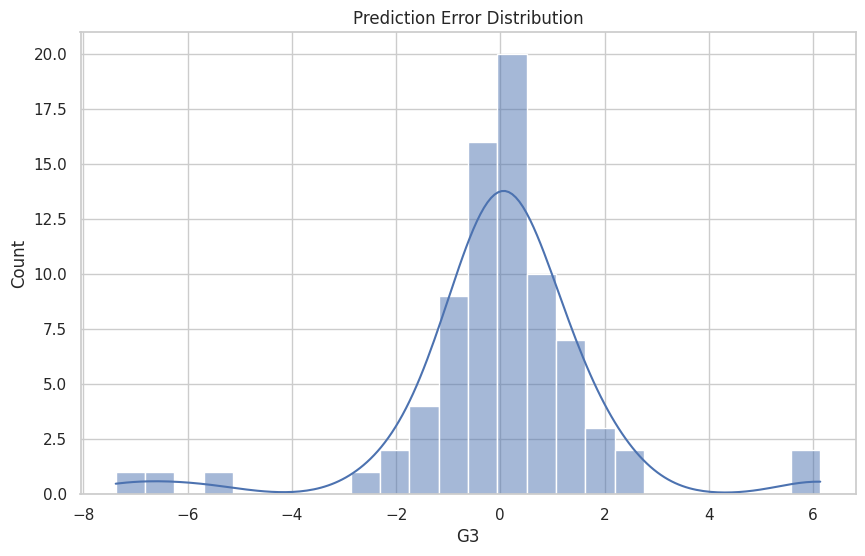

In [ ]:
error = y_test - y_pred_rf

plt.figure()
sns.histplot(error, kde=True)
plt.title("Prediction Error Distribution")
plt.show()



**Features Importance**

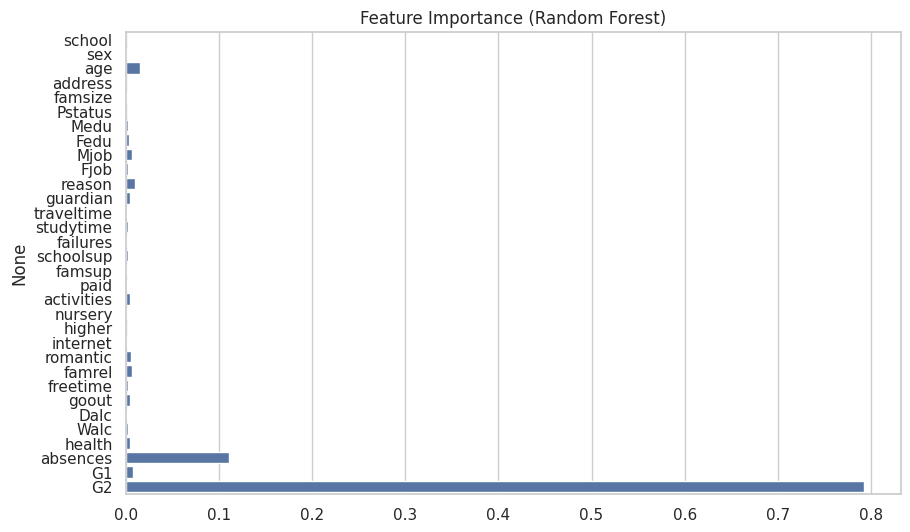

In [ ]:
importance = model_rf.feature_importances_

feature_names = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importance, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.show()


**Model comparison**

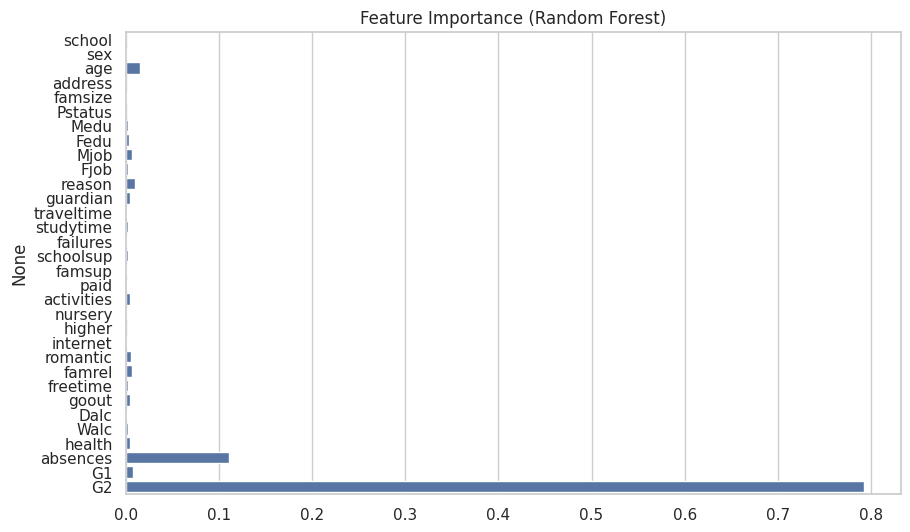

In [ ]:
importance = model_rf.feature_importances_

feature_names = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importance, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.show()


**Redisual Plot**

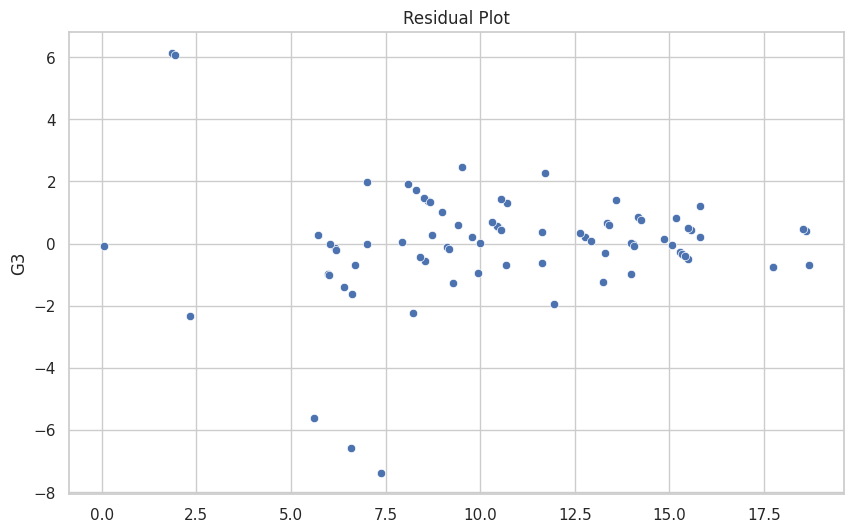

In [ ]:
plt.figure()
sns.scatterplot(x=y_pred_rf, y=error)
plt.title("Residual Plot")
plt.show()


**Features and Target Define**

In [ ]:
X = df.drop("G3", axis=1)
y = df["G3"]

**Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Feature Scaling**

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Create Neural Network Mode**

In [ ]:
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(1))

**Model Compile**

In [ ]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae']
)

**Model Summary**

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,593 (57.00 KB)

 Trainable params: 14,593 (57.00 KB)

 Non-trainable params: 0 (0.00 B)

**Model Train**

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 123.2750 - mae: 10.1853 - val_loss: 108.1536 - val_mae: 9.7020
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 100.6740 - mae: 9.1068 - val_loss: 83.2064 - val_mae: 8.4890
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 79.9910 - mae: 8.2973 - val_loss: 52.8596 - val_mae: 6.6472
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 44.2713 - mae: 5.9864 - val_loss: 26.1631 - val_mae: 4.5030
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 24.0104 - mae: 4.0398 - val_loss: 16.5460 - val_mae: 3.0661
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 15.2891 - mae: 2.8959 - val_loss: 14.8434 - val_mae: 2.7350
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 12.2591 - mae: 2.5875 - val_loss: 10.8209 - val_mae: 2.4293
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.2271 - mae: 2.1441 - val_loss: 9.5401 - val_mae: 2.3657
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - lo

**Prediction**

In [ ]:
y_pred_dl = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


**Check Accuracy**

In [ ]:
mae_dl = mean_absolute_error(y_test, y_pred_dl)
mse_dl = mean_squared_error(y_test, y_pred_dl)
r2_dl = r2_score(y_test, y_pred_dl)

print("Deep Learning MAE:", mae_dl)
print("Deep Learning MSE:", mse_dl)
print("Deep Learning R2 Score:", r2_dl)

Deep Learning MAE: 2.002553701400757
Deep Learning MSE: 7.436437129974365
Deep Learning R2 Score: 0.6373363137245178


**Actual Vs predicted Graph**

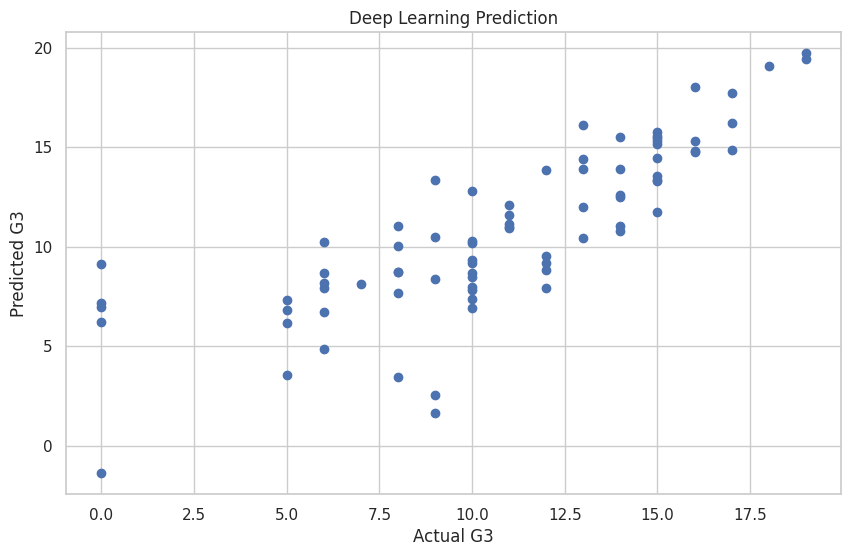

In [ ]:
plt.figure()

plt.scatter(y_test, y_pred_dl)

plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")

plt.title("Deep Learning Prediction")

plt.show()

**Training Loss Graph**

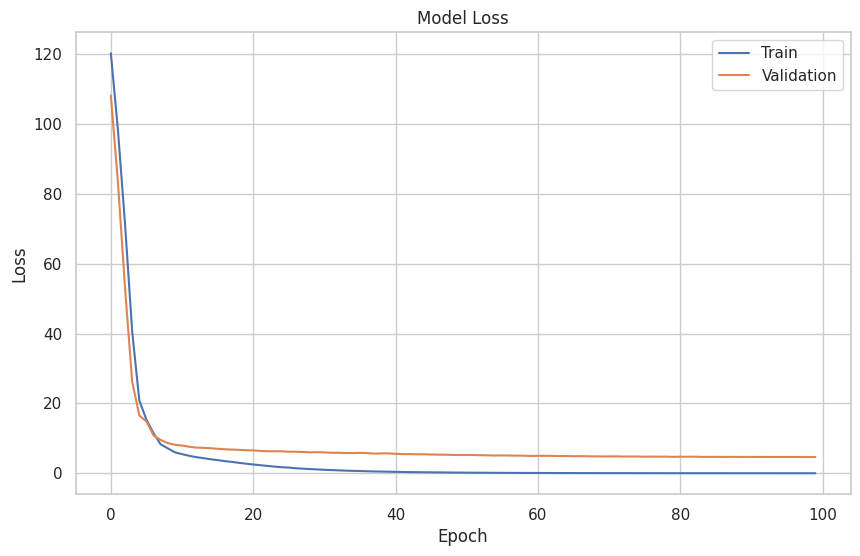

In [ ]:
plt.figure()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title("Model Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend(["Train", "Validation"])

plt.show()

**Error Distribution Graph**

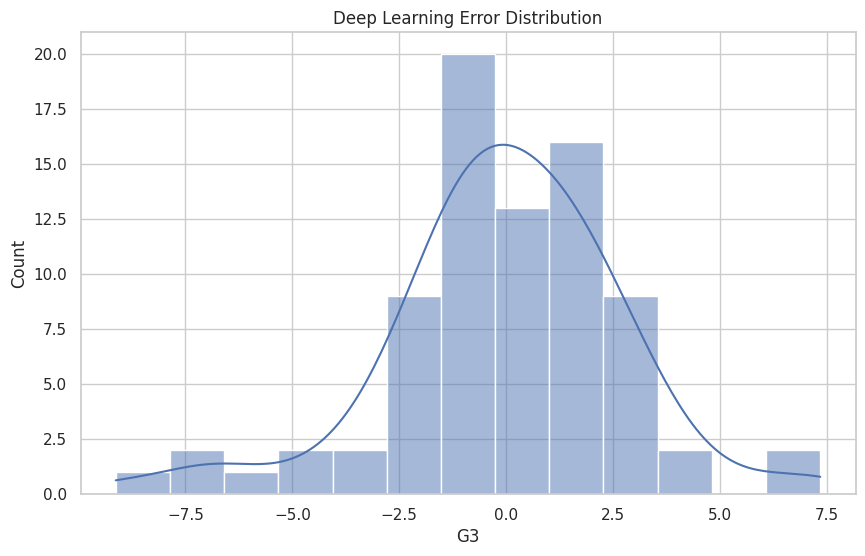

In [ ]:
error = y_test - y_pred_dl.flatten()

plt.figure()

sns.histplot(error, kde=True)

plt.title("Deep Learning Error Distribution")

plt.show()

**Advanced Neural Network Model**

In [ ]:
model = Sequential()

model.add(Dense(256, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))

model.add(Dense(1))

**Compile Model**

In [ ]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae']
)

**Model Summary**

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,713 (202.00 KB)

 Trainable params: 51,713 (202.00 KB)

 Non-trainable params: 0 (0.00 B)

**Train Model**

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=150,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - loss: 121.6338 - mae: 10.1469 - val_loss: 88.1826 - val_mae: 8.7546
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 76.7666 - mae: 7.9984 - val_loss: 32.1713 - val_mae: 5.0467
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 30.7271 - mae: 4.7167 - val_loss: 22.7844 - val_mae: 3.1124
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 21.7555 - mae: 3.5573 - val_loss: 12.0696 - val_mae: 2.4313
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 12.4501 - mae: 2.8274 - val_loss: 12.0121 - val_mae: 2.8759
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 12.4388 - mae: 2.8570 - val_loss: 9.6435 - val_mae: 2.3570
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 9.7571 - mae: 2.4686 - val_loss: 8.7886 - val_mae: 2.2584
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.0730 - mae: 2.4692 - val_loss: 8.2220 - val_mae: 2.2011
Epoch 9/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 

**Prediction**

In [ ]:
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


**Accuracy Metrics**

In [ ]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 2.4102866649627686
MSE: 9.357097625732422
R2 Score: 0.5436686277389526


**Actual Vs Predicted Scatter**

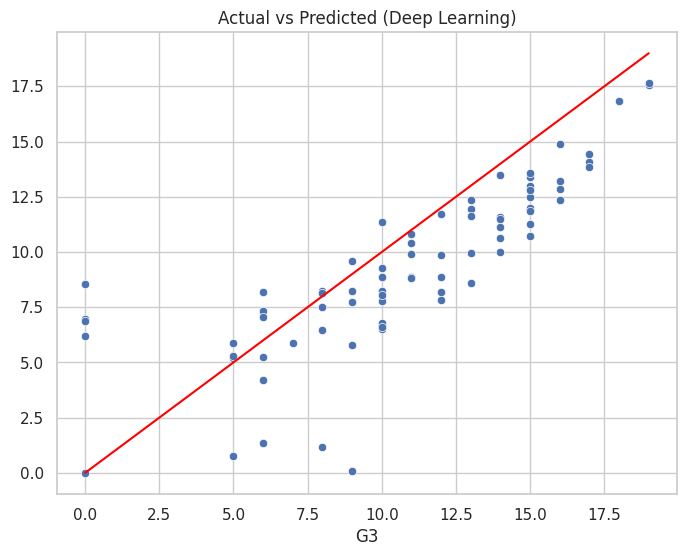

In [ ]:
plt.figure(figsize=(8,6))

sns.scatterplot(x=y_test, y=y_pred.flatten())

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')

plt.title("Actual vs Predicted (Deep Learning)")

plt.show()

**Training Loss Curve**

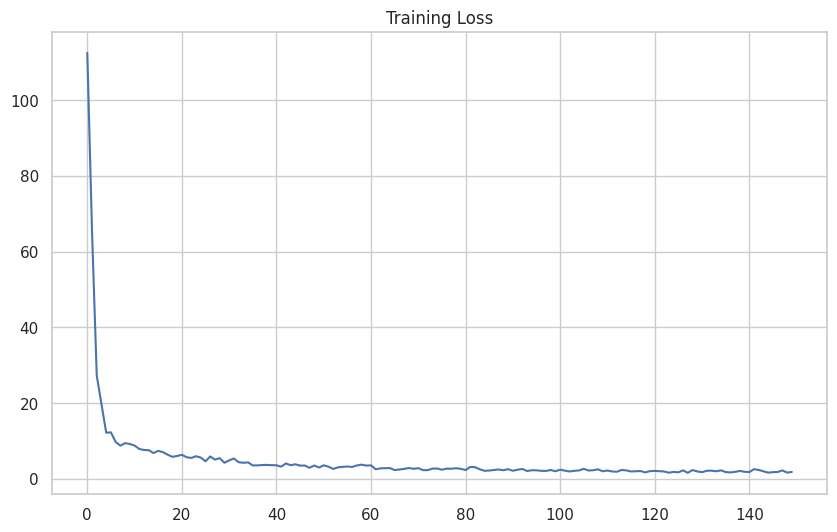

In [ ]:
plt.figure()

plt.plot(history.history['loss'])

plt.title("Training Loss")

plt.show()

**Valiadation loss Curve**

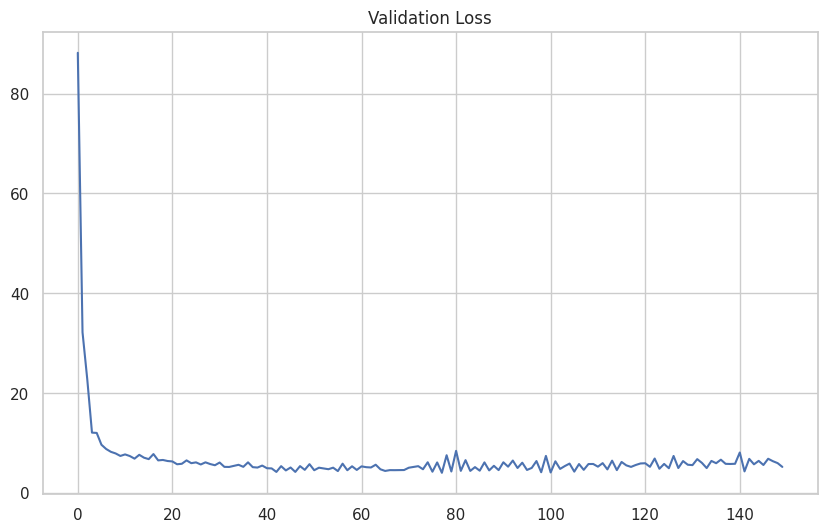

In [ ]:
plt.figure()

plt.plot(history.history['val_loss'])

plt.title("Validation Loss")

plt.show()

**combined Loss Curve**

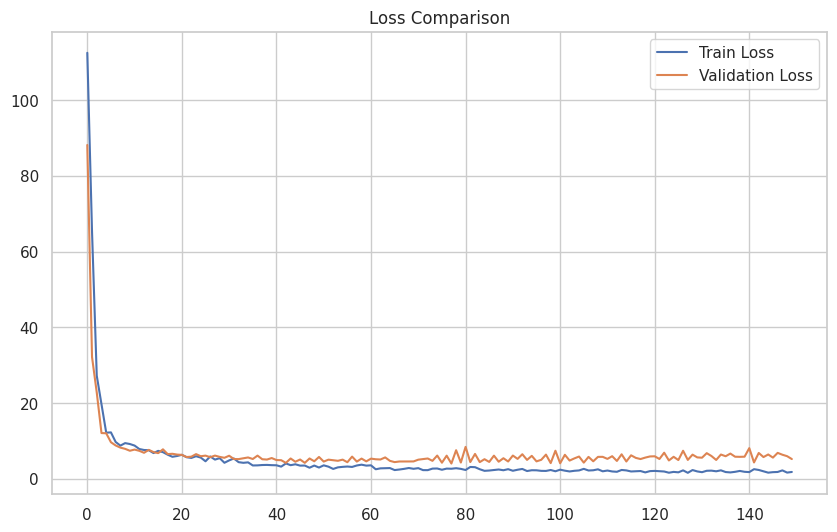

In [ ]:
plt.figure()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(["Train Loss","Validation Loss"])

plt.title("Loss Comparison")

plt.show()

**Error Distribution**

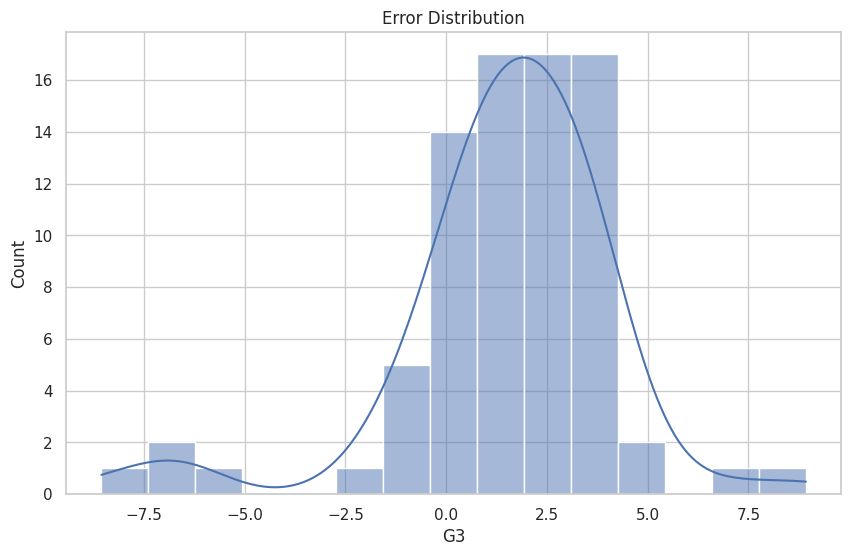

In [ ]:
error = y_test - y_pred.flatten()

plt.figure()

sns.histplot(error, kde=True)

plt.title("Error Distribution")

plt.show()

**Residual plot**

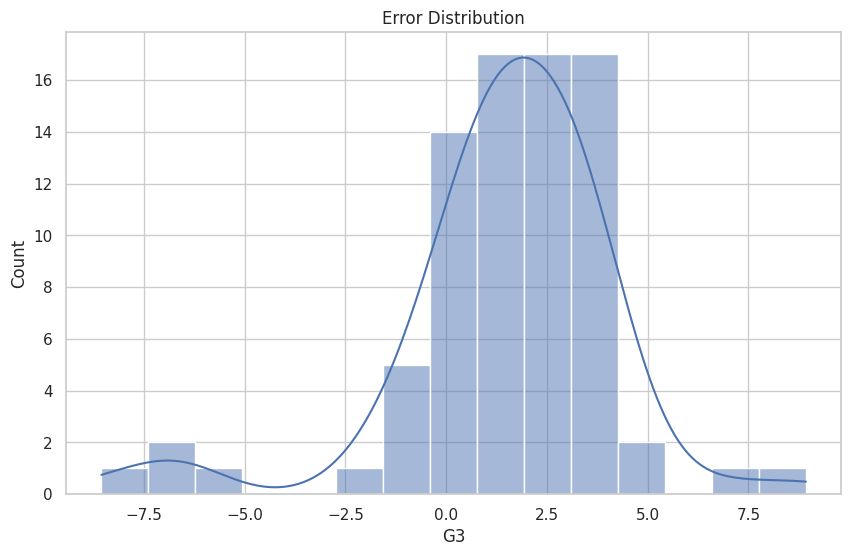

In [ ]:
error = y_test - y_pred.flatten()

plt.figure()

sns.histplot(error, kde=True)

plt.title("Error Distribution")

plt.show()

**Prediction Line Graph**

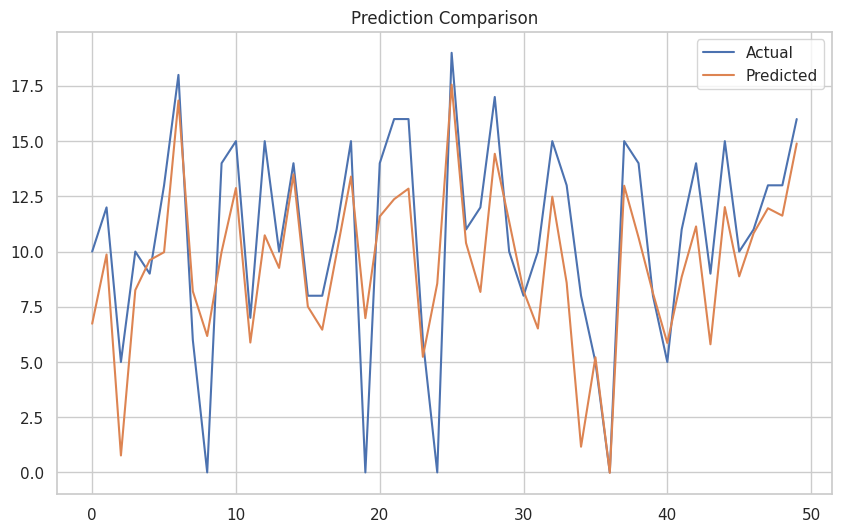

In [ ]:
plt.figure()

plt.plot(y_test.values[:50])
plt.plot(y_pred.flatten()[:50])

plt.legend(["Actual","Predicted"])

plt.title("Prediction Comparison")

plt.show()

**Box plot Prediction**

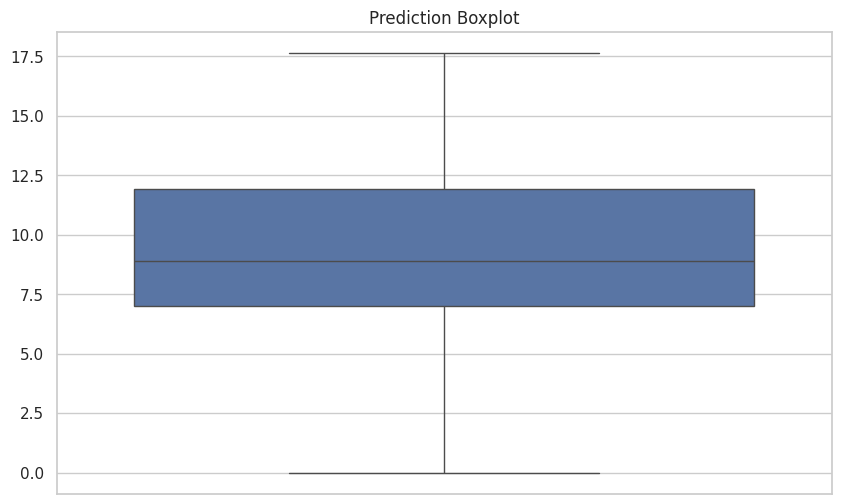

In [ ]:
plt.figure()

sns.boxplot(y=y_pred.flatten())

plt.title("Prediction Boxplot")

plt.show()

**KDE Prediction Distribution**

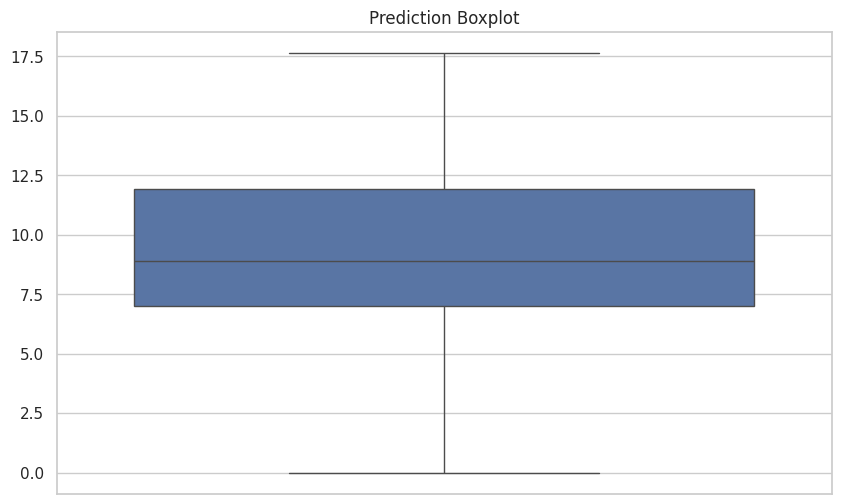

In [ ]:
plt.figure()

sns.boxplot(y=y_pred.flatten())

plt.title("Prediction Boxplot")

plt.show()

**Error Vs Actual Graph**

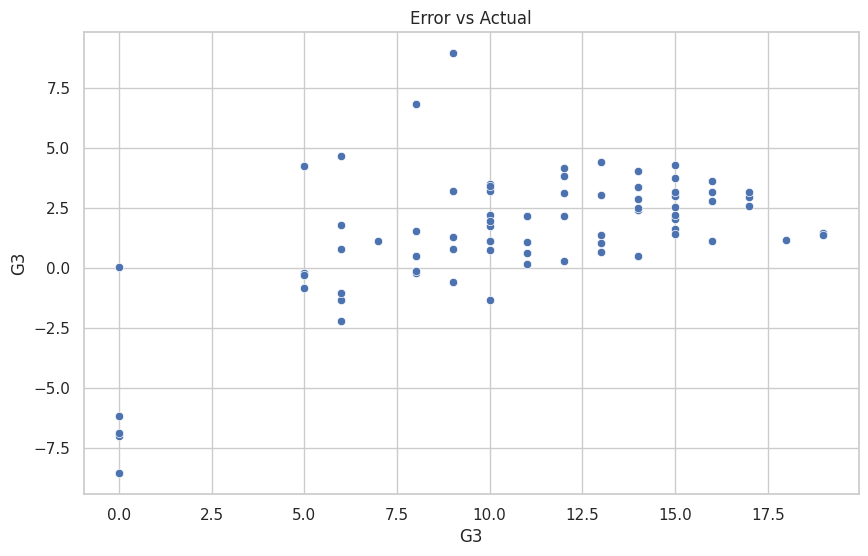

In [ ]:
plt.figure()

sns.scatterplot(x=y_test, y=error)

plt.title("Error vs Actual")

plt.show()

**Model Performance Bar chart**

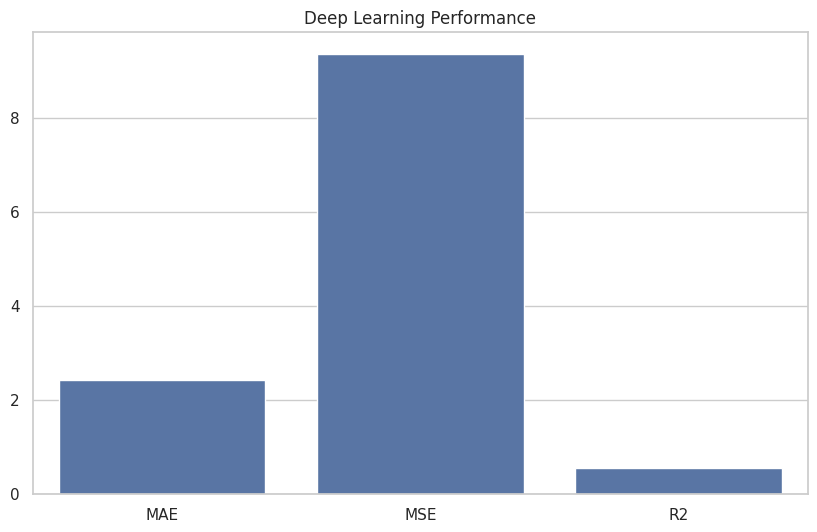

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

metrics = ["MAE","MSE","R2"]
values = [mae, mse, r2]

plt.figure()

sns.barplot(x=metrics, y=values)

plt.title("Deep Learning Performance")

plt.show()